In [44]:
# to do: modify the save crop function
# to do: modify the images output folder 
!python yolov5/detect.py --source data/PXL_20220821_034332128.mp4 --save-crop

detect: weights=yolov5/yolov5s.pt, source=data/PXL_20220821_034332128.mp4, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2022-8-19 Python-3.8.13 torch-1.12.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
video 1/1 (1/172) /Users/racheltay/Documents/school/capstone/cp5105-capstone-proj/data/PXL_20220821_034332128.mp4: 640x384 1 dog, 2 cups, 1 mouse, 1 remote, 247.2ms
video 1/1 (2/172) /Users/racheltay/Documents/school/capstone/cp5105-capstone-proj/data/PXL_20220821_034332128.mp4: 640x384 2 cups, 1 mouse, 1 remote, 270.3ms
video 1/1 (3/172) /Users/racheltay/Documents/school/capstone/cp5105-capstone-p

In [14]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F


plt.rcParams["savefig.bbox"] = "tight"
# sphinx_gallery_thumbnail_number = 2


def plot(imgs, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0])
    _, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            img = F.to_pil_image(img.to("cpu"))
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    plt.tight_layout()

In [13]:
import os
import torchvision
from torchvision.io import read_video

video_path = os.getcwd()+"/data/PXL_20220821_034332128.mp4"
frames, _, _ = read_video(str(video_path), output_format="TCHW")

/Users/racheltay/miniconda3/envs/capstone/lib/python3.8/site-packages/torchvision/io/video.py:162: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


In [15]:
frames.shape

torch.Size([172, 3, 1080, 1920])

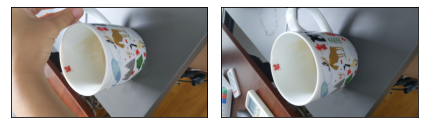

In [16]:
img1_batch = torch.stack([frames[100], frames[150]])
img2_batch = torch.stack([frames[101], frames[151]])

plot(img1_batch)

In [28]:
frames[0].unsqueeze(0).shape

torch.Size([1, 3, 1080, 1920])

In [41]:
import cv2 

path = "data/PXL_20220821_034332128.mp4"
vidcap = cv2.VideoCapture(path)

def getFrame(sec):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames,image = vidcap.read()
    if hasFrames:
        cv2.imwrite("./data/test/anchor"+str(count)+".jpg", image)     # save frame as JPG file
    return hasFrames

sec = 0
frameRate = 0.5 #//it will capture image in each 0.5 second
count=1
success = getFrame(sec)
while success:
    count = count + 1
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec)

In [45]:
# import torch
# import cv2

# # PyTorch Hub Model
# model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or yolov5n - yolov5x6, custom

# path = "data/PXL_20220821_034332128.mp4"
# video = cv2.VideoCapture(path)

# # Inference
# results = model(video)

# # Results
# results.print()  # or .show(), .save(), .crop(), .pandas(), etc.